<a href="https://colab.research.google.com/github/archanagm296/linear-regression-model/blob/main/Linear_regression_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/car_purchasing 2.csv',encoding = "latin1")
print(df)

       customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0 

In [ ]:
df2=df.copy()
df2.info()
df2.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
df2.drop(['customer name','customer e-mail','country','gender'],axis=1,inplace=True)
df2.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


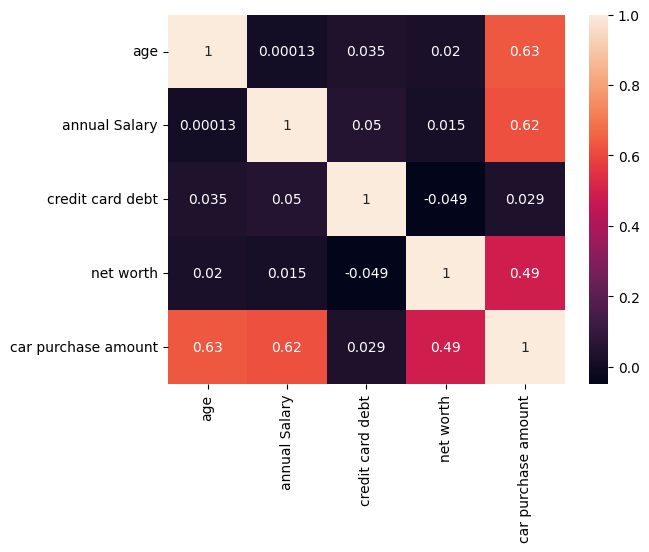

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = df2.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]
print(x)
print(y)

           age  annual Salary  credit card debt    net worth
0    41.851720    62812.09301      11609.380910  238961.2505
1    40.870623    66646.89292       9572.957136  530973.9078
2    43.152897    53798.55112      11160.355060  638467.1773
3    58.271369    79370.03798      14426.164850  548599.0524
4    57.313749    59729.15130       5358.712177  560304.0671
..         ...            ...               ...          ...
495  41.462515    71942.40291       6995.902524  541670.1016
496  37.642000    56039.49793      12301.456790  360419.0988
497  53.943497    68888.77805      10611.606860  764531.3203
498  59.160509    49811.99062      14013.034510  337826.6382
499  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 4 columns]
0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 

converting 1 dimensional array to 2 dimensional array

In [ ]:
import numpy as np
y=y.values.reshape(-1,1)


Feature scaling - minimal scaling - x-xmin/xmax-xmin

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)
#print(x)
#print(y)

split the data for training-80% and testing-20%

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, shuffle=True,random_state=42)
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(450, 4) (50, 4) (450, 1) (50, 1)


training the model

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_train,y_train)
lr_pred=lr_model.predict(x_test)
print(lr_pred)

[[0.52231685]
 [0.50789432]
 [0.76171373]
 [0.32166606]
 [0.72480147]
 [0.76250842]
 [0.61239342]
 [0.64447505]
 [0.61559305]
 [0.54745689]
 [0.41109552]
 [0.66520493]
 [0.49804618]
 [0.42257768]
 [0.43630547]
 [0.65033256]
 [0.56198773]
 [0.1209083 ]
 [0.72575145]
 [0.5773452 ]
 [0.45566118]
 [0.61670444]
 [0.60185947]
 [0.4090556 ]
 [0.45570511]
 [0.41185318]
 [0.77671449]
 [0.54913426]
 [0.19270561]
 [0.6090572 ]
 [0.65025438]
 [0.51914665]
 [0.45279967]
 [0.68212217]
 [0.47783412]
 [0.43509987]
 [0.74270412]
 [0.30761232]
 [0.46775238]
 [0.43796587]
 [0.68031284]
 [0.72775093]
 [0.54145481]
 [0.38927463]
 [0.62660889]
 [0.49906842]
 [0.37071495]
 [0.46886964]
 [0.60643566]
 [0.53861544]]


evaluating the model

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,lr_pred)

0.9999999803460698

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,lr_pred)
print(mse)

3.9922134535627505e-10


In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,lr_pred)
print(mae)

1.5643085270685697e-05


In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_test,lr_pred)
print(rmse)

1.9980524151189704e-05


In [ ]:
from sklearn.linear_model import Ridge
ridge_model=Ridge()
ridge_model.fit(x_train,y_train)
ridge_model.score(x_train,y_train)
ridge_pred=ridge_model.predict(x_test)
print (ridge_pred)

[0.51945011 0.50644779 0.74174479 0.33268795 0.70906355 0.74272148
 0.60555902 0.63310115 0.60871621 0.54177327 0.41908515 0.65238203
 0.4976066  0.42701542 0.44033768 0.63747913 0.55570695 0.15180641
 0.70829523 0.56750613 0.45781469 0.60440046 0.59434257 0.41698994
 0.46020138 0.41937342 0.75561652 0.54303594 0.2168147  0.59999
 0.63765023 0.51394768 0.45877537 0.66384929 0.48122814 0.43993815
 0.72124251 0.32242101 0.46904244 0.44273589 0.66490564 0.70902949
 0.54053302 0.39581791 0.61594406 0.49850942 0.37934646 0.47059034
 0.59461473 0.53470898]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,ridge_pred)

0.993088515572063

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,ridge_pred)
print(mse)

0.00014038983995427292


In [ ]:
from sklearn.linear_model import Lasso
lasso_model=Lasso()
lasso_model.fit(x_train,y_train)
lasso_model.score(x_train,y_train)
lasso_pred=lasso_model.predict(x_test)
print (lasso_pred)

[0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,lasso_pred)

-0.0967877807853319

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,lasso_pred)
print(mse)

0.022278551389895256


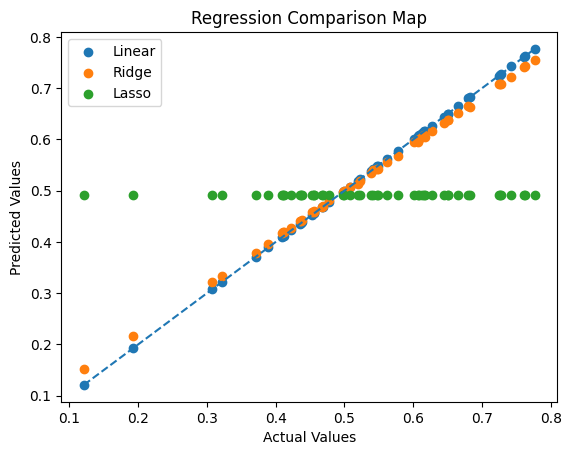

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(y_test, lr_pred, label="Linear")
plt.scatter(y_test, ridge_pred, label="Ridge")
plt.scatter(y_test, lasso_pred, label="Lasso")

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Comparison Map")
plt.legend()
plt.show()


1.Linear Regression is capturing the underlying trend very well and produces
accurate predictions across the full range of values.

2.Ridge Regression performs almost as well as Linear Regression and is more stable, especially if multicollinearity exists in the data.

3.Lasso Regression is too aggressive for this dataset and fails to capture the relationship between features and target.
